Epoch 1/1000
38/38 [==============================] - 15s 78ms/step - loss: 2.3041 - accuracy: 0.1017 - val_loss: 2.3019 - val_accuracy: 0.0883
Epoch 2/1000
38/38 [==============================] - 2s 41ms/step - loss: 2.3023 - accuracy: 0.0954 - val_loss: 2.3010 - val_accuracy: 0.1000
Epoch 3/1000
38/38 [==============================] - 2s 41ms/step - loss: 2.3006 - accuracy: 0.1013 - val_loss: 2.3013 - val_accuracy: 0.1000
Epoch 4/1000
38/38 [==============================] - 2s 48ms/step - loss: 2.2995 - accuracy: 0.1175 - val_loss: 2.2994 - val_accuracy: 0.1217
Epoch 5/1000
38/38 [==============================] - 2s 42ms/step - loss: 2.2997 - accuracy: 0.1133 - val_loss: 2.3007 - val_accuracy: 0.1167
Epoch 6/1000
38/38 [==============================] - 2s 46ms/step - loss: 2.2972 - accuracy: 0.1096 - val_loss: 2.2986 - val_accuracy: 0.1050
Epoch 7/1000
38/38 [==============================] - 2s 60ms/step - loss: 2.2886 - accuracy: 0.1142 - val_loss: 2.2936 - val_accuracy: 0.125

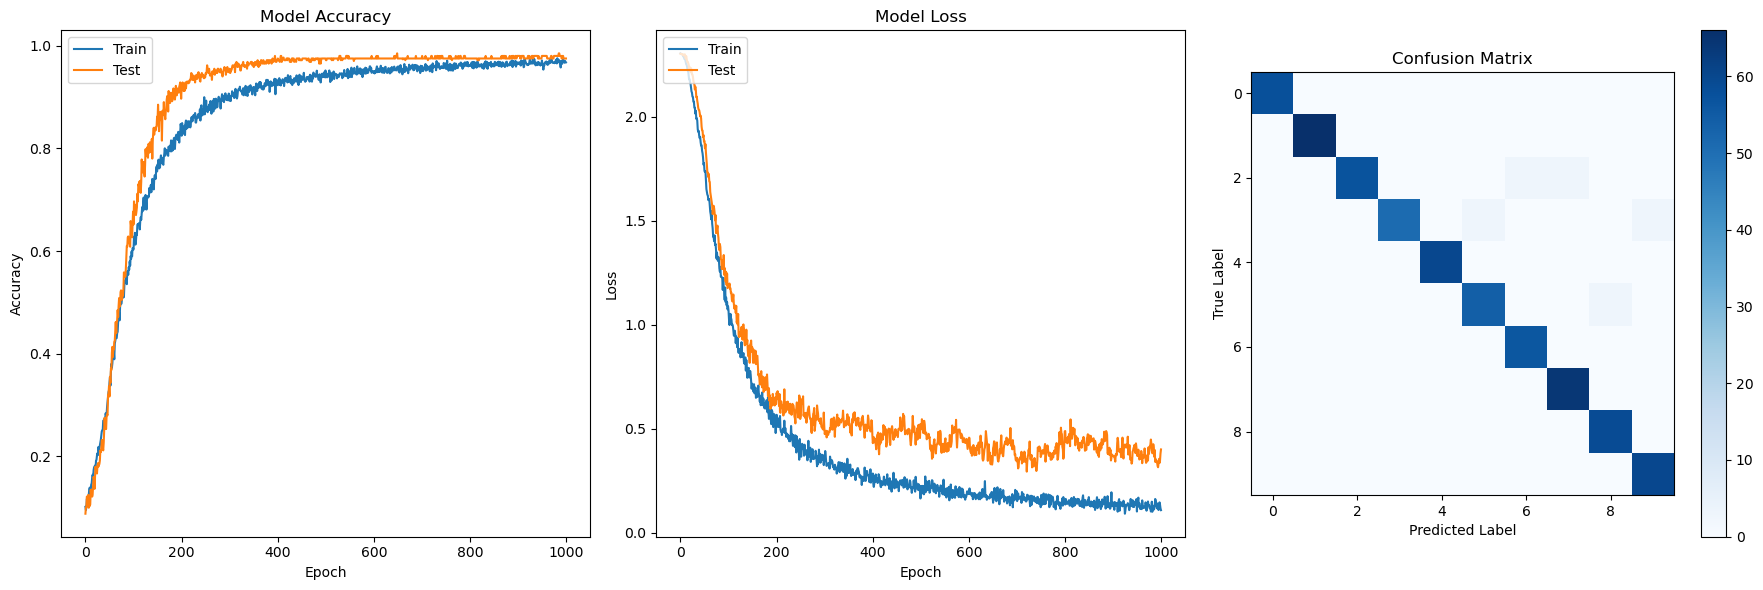

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Reading the data
data = pd.read_csv("PQM_FACTORS.csv")

# Separating features and target variable
features = data.columns.difference(['Seriousness'])
X = data[features]
Y = pd.get_dummies(data["Seriousness"])  # One-hot encode the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a more complex ANN model with changed architecture
model = Sequential()

# Input layer
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.45))

# Hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.45))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Additional hidden layers (novelty)
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), verbose = True)

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(np.array(y_test), axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Plot training history
plt.figure(figsize=(18, 6))

# Plot training & validation accuracy values
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

# Confusion Matrix
plt.subplot(1, 3, 3)
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test.values, axis=1), y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()